In [ ]:
# Mount your google drive where you've saved your assignment folder
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import os
os.chdir('/content/gdrive/My Drive/Object_Detection_Transformers/main-repo')

In [ ]:
!pip install torch==1.8.0+cu111 torchvision==0.9.0+cu111 -f https://download.pytorch.org/whl/torch_stable.html


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |█████████████▌                  | 834.1 MB 1.3 MB/s eta 0:14:29tcmalloc: large alloc 1147494400 bytes == 0x3a288000 @  0x7f47a1053615 0x5d631c 0x51e4f1 0x51e67b 0x4f7585 0x49ca7c 0x4fdff5 0x49caa1 0x4fdff5 0x49ced5 0x4f60a9 0x55f926 0x4f60a9 0x55f926 0x4f60a9 0x55f926 0x5d7c18 0x5d9412 0x586636 0x5d813c 0x55f3fd 0x55e571 0x5d7cf1 0x49ced5 0x55e571 0x5d7cf1 0x49ec69 0x5d7c18 0x49ca7c 0x4fdff5 0x49ced5
     |█████████████████               | 1055.7 MB 1.2 MB/s eta 0:12:53tcmalloc: large alloc 1434370048 bytes == 0x7e8de000 @  0x7f47a1053615 0x5d631c 0x51e4f1 0x51e67b 0x4f7585 0x49ca7c 0x4fdff5 0x49caa1 0x4fdff5 0x49ced5 0x4f60a9 0x55f926 0x4f60a9 0x55f926 0x4f60a9 0x55f926 0x5d7c18 0x5d9412 0x586636 0x5d813c 0x55f3fd 0x55e571 0x5d7cf1 0x49ced5 0x55e571 0x5d7cf1 0x49ec69 0x5d7c18 0x49ca7c 0x4fdff5 0x49ced5
     |█████

In [ ]:
!python main.py --epochs 2 --dataset_file face --data_path /content/gdrive/MyDrive/Object_Detection_Transformers/main-repo/ --output_dir my_output

Not using distributed mode
fatal: not a git repository (or any parent up to mount point /content)
Stopping at filesystem boundary (GIT_DISCOVERY_ACROSS_FILESYSTEM not set).
git:
  sha: N/A, status: clean, branch: N/A

Namespace(aux_loss=True, backbone='resnet50', batch_size=2, bbox_loss_coef=5, clip_max_norm=0.1, coco_panoptic_path=None, data_path='/content/gdrive/MyDrive/Object_Detection_Transformers/main-repo/', dataset_file='face', dec_layers=6, device='cuda', dice_loss_coef=1, dilation=False, dim_feedforward=2048, dist_url='env://', distributed=False, dropout=0.1, enc_layers=6, eos_coef=0.1, epochs=2, eval=False, frozen_weights=None, giou_loss_coef=2, hidden_dim=256, lr=0.0001, lr_backbone=1e-05, lr_drop=200, mask_loss_coef=1, masks=False, nheads=8, num_queries=10, num_workers=2, output_dir='my_output', position_embedding='sine', pre_norm=False, remove_difficult=False, resume='', seed=42, set_cost_bbox=5, set_cost_class=1, set_cost_giou=2, start_epoch=0, weight_decay=0.0001, world_

In [ ]:
!apt-get install -y xvfb # Install X Virtual Frame Buffer
import os
os.system('Xvfb :1 -screen 0 1600x1200x16  &')    # create virtual display with size 1600x1200 and 16 bit color. Color can be changed to 24 or 8
os.environ['DISPLAY']=':1.0'    # tell X clients to use our virtual DISPLAY :1.0

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following NEW packages will be installed:
  xvfb
0 upgraded, 1 newly installed, 0 to remove and 7 not upgraded.
Need to get 785 kB of archives.
After this operation, 2,271 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/universe amd64 xvfb amd64 2:1.19.6-1ubuntu4.12 [785 kB]
Fetched 785 kB in 2s (373 kB/s)
Selecting previously unselected package xvfb.
(Reading database ... 124015 files and directories currently installed.)
Preparing to unpack .../xvfb_2%3a1.19.6-1ubuntu4.12_amd64.deb ...
Unpacking xvfb (2:1.19.6-1ubuntu4.12) ...
Setting up xvfb (2:1.19.6-1ubuntu4.12) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...


In [1]:
!python test.py --data_path /content/gdrive/MyDrive/Object_Detection_Transformers/main-repo/dataset/test/images --resume /content/gdrive/MyDrive/Object_Detection_Transformers/main-repo/my_output/checkpoint.pth  --output_dir /content/gdrive/MyDrive/Object_Detection_Transformers/main-repo/results

python3: can't open file 'test.py': [Errno 2] No such file or directory


In [ ]:
from tensorflow import keras
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import cv2


images, targets = [], []
#------------------TESTING DATA-------------------------------
path_images = "/content/gdrive/My Drive/Object_Detection_Transformers/main-repo/dataset/test/images/"
path_annot = "/content/gdrive/My Drive/Object_Detection_Transformers/main-repo/dataset/test/labels/"
path_result="/content/gdrive/My Drive/Object_Detection_Transformers/main-repo/results/images/"


# list of paths to images and annotations
image_paths = [
    f for f in os.listdir(path_images) if os.path.isfile(os.path.join(path_images, f))
]
annot_paths = [
    f for f in os.listdir(path_annot) if os.path.isfile(os.path.join(path_annot, f))
]
image_result = [
    f for f in os.listdir(path_result) if os.path.isfile(os.path.join(path_result, f))
]
#print(annot_paths[: 10])
image_size = 224  

image_paths.sort()
annot_paths.sort()
image_result.sort()
horn={'0':"Elk",'1':"Stag"}
for i in range(5):
    image = keras.utils.load_img(
        path_images + image_paths[i],
    )
    (w, h) = image.size[:2]
    # resize train set images
    #if i < int(len(annot_paths) * 0.8):
        # resize image if it is for training datase t
    image = image.resize((image_size, image_size))

    # convert image to array and append to list
    images.append(keras.utils.img_to_array(image))
    
    # plt.figure(figsize=(15, 5))
    # plt.subplot(1, 2, 1)
    # plt.imshow(image)
    # plt.title(' test image')
    # plt.axis("off")
    fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(10, 10))
    plt.axis('off')

    # Display the image
    ax1.imshow(image)
   
    f = open(path_annot +  image_paths[i][:-3]+"txt", "r")
    line = f.readline()
   # print( path_images + image_paths[i])
   # print(path_annot +  annot_paths[i])
    while line:
       coordinates = line.split()
       line = f.readline()
       x_center, y_center ,box_width, box_height  = float(coordinates[1]) , float(coordinates[2]) , float(coordinates[3]) , float(coordinates[4] )
       top_left_x = x_center - box_width / 2 
       top_left_y = y_center - box_height / 2
       bottom_right_x = x_center + box_width / 2 
       bottom_right_y = y_center + box_height / 2  
 
       print(top_left_x * image_size , top_left_y * image_size,bottom_right_x * image_size, bottom_right_y * image_size)

        
        # Create the bounding box
        
       rect = patches.Rectangle(
          (top_left_x * image_size, top_left_y * image_size),
          (bottom_right_x - top_left_x) * image_size,
          (bottom_right_y - top_left_y) * image_size,
          facecolor="none",
          edgecolor="red",
          linewidth=1,
          label='Label',
        )
       ax1.add_patch(rect)
       x= (top_left_x * image_size)+(bottom_right_x - top_left_x) * image_size/2
       y= (top_left_y * image_size)+(bottom_right_y - top_left_y) * image_size/2
       ax1.annotate(horn[coordinates[0]], (x, y), color='white', weight='bold', fontsize=10, ha='center', va='center')

       #plt.add_patch(rect)
    f.close()
    image1 = keras.utils.load_img(
        path_result + image_result[i],
    )
    # plt.subplot(1, 2, 2)
    # plt.imshow(image1)
    # plt.title(' result image')
    # plt.axis("off")
    #print("result= "+path_result + image_result[i])
    ax2.imshow(image1)

    # Add the bounding box to the image
    
    plt.show()

NameError: ignored

In [ ]:
def bbox_iou(bbox_a, bbox_b):
    """Calculate the Intersection of Unions (IoUs) between bounding boxes.

    IoU is calculated as a ratio of area of the intersection
    and area of the union.

    both inputs and output should be python list
    """
    ##########--WRITE YOUR CODE HERE--##########

    a = np.array(bbox_a)
    b = np.array(bbox_b)
    a = a.repeat(b.shape[0], axis = 0)

    top_left_a = a[ : , [0,1]] 
    top_left_b = b[ : , [0,1]]
    bottom_right_a = a[ : , [2,3]] 
    bottom_right_b = b[ : , [2,3]]
    max_pts = np.maximum(top_left_a , top_left_b)
    min_pts = np.minimum(bottom_right_a , bottom_right_b)

    inter_pts = np.concatenate((max_pts , min_pts) , axis = 1)

    inter_dim = np.stack( [inter_pts[: , 2] -  inter_pts[: , 0] , inter_pts[: , 3] -  inter_pts[: , 1] ] , axis = 0).T
    inter_dim[inter_dim < 0] = 0 
    inter = np.multiply( inter_dim[:, 0] , inter_dim[:,1])

    gt_area = (bbox_a[0][2] - bbox_a[0][0]) * (bbox_a[0][3] - bbox_a[0][1])

    bbox_b_dim = np.stack( [b[: , 2] -  b[: , 0] , b[: , 3] -  b[: , 1] ] , axis = 0).T
    bbox_b_areas = np.multiply( bbox_b_dim[:, 0] , bbox_b_dim[:,1])

    union = bbox_b_areas - inter + gt_area

    iou = [( inter / union ).tolist()]



    ##########-------END OF CODE-------########## 
    return iou

bbox_gt = [[141,147,247,192]]
iou = bbox_iou(bbox_gt, bbox)
bbox_filter = []
iou_max = 0.0
bbox_max = None
for bbox_, iou_ in zip(bbox, iou[0]):
  # get bbox of maximum iou
  if iou_ > iou_max:
    iou_max = iou_
    bbox_max = bbox_
  # only keep bbox of high iou as postive and low iou as negative
  if iou_>=0.25 and iou_<=0.7:
    continue
  print("gt:{}  bbox:{}  iou:{:.4f}".format(bbox_gt[0], bbox_, iou_))
  bbox_filter.append(bbox_)

img_gt_b = vis_detections(img_gt, bbox_filter, (0,0,255), (0,0,300,400))

In [ ]:
def box_iou(boxes1, boxes2):
    """Compute pairwise IoU across two lists of anchor or bounding boxes."""
    box_area = lambda boxes: ((boxes[:, 2] - boxes[:, 0]) *
                              (boxes[:, 3] - boxes[:, 1]))
 

    areas1 = box_area(boxes1)
    areas2 = box_area(boxes2)
   

    inter_upperlefts = torch.max(boxes1[:, None, :2], boxes2[:, :2])
    inter_lowerrights = torch.min(boxes1[:, None, 2:], boxes2[:, 2:])
    inters = (inter_lowerrights - inter_upperlefts).clamp(min=0)

    inter_areas = inters[:, :, 0] * inters[:, :, 1]
    union_areas = areas1[:, None] + areas2 - inter_areas
    return inter_areas / union_areas

11.8125 115.9375 23.1875 131.6875


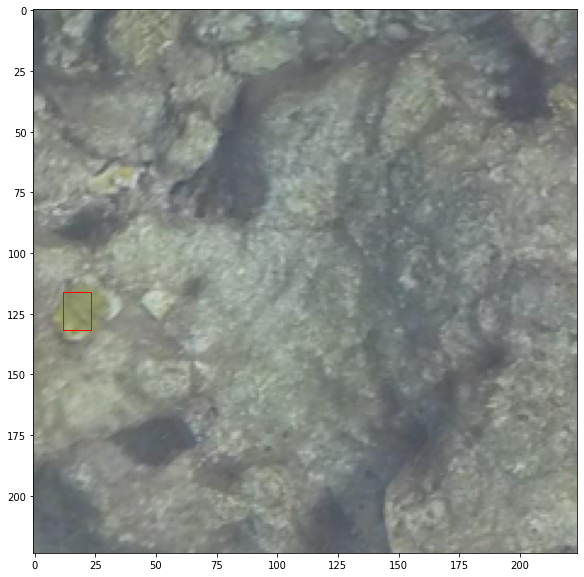

180.6875 33.25 224.0 75.25
0.0 50.75 23.1875 119.4375
90.125 72.625 154.875 104.125
56.4375 119.4375 115.9375 174.125


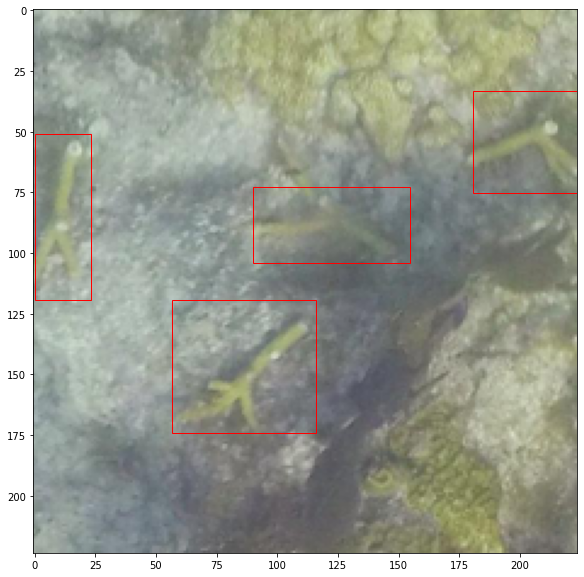

In [ ]:
from tensorflow import keras
import matplotlib.pyplot as plt
import matplotlib.patches as patches



images, targets = [], []
#------------------TESTING DATA-------------------------------
path_images = "/content/gdrive/My Drive/Object_Detection_Transformers/main-repo/dataset/test/temp/images/"
path_annot = "/content/gdrive/My Drive/Object_Detection_Transformers/main-repo/dataset/test/temp/labels/"



# list of paths to images and annotations
image_paths = [
    f for f in os.listdir(path_images) if os.path.isfile(os.path.join(path_images, f))
]
annot_paths = [
    f for f in os.listdir(path_annot) if os.path.isfile(os.path.join(path_annot, f))
]
#print(annot_paths[: 10])
image_size = 224  
image_paths.sort()
annot_paths.sort()

for i in range(2):
    image = keras.utils.load_img(
        path_images + image_paths[i],
    )
    (w, h) = image.size[:2]
    # resize train set images
    #if i < int(len(annot_paths) * 0.8):
        # resize image if it is for training dataset
    image = image.resize((image_size, image_size))

    # convert image to array and append to list
    images.append(keras.utils.img_to_array(image))

    fig, ax1 = plt.subplots(1, 1, figsize=(10, 10))
    # Display the image
    ax1.imshow(image)
    
    f = open(path_annot +  annot_paths[i], "r")
    line = f.readline()
    while line:
       coordinates = line.split()
       line = f.readline()
       x_center, y_center ,box_width, box_height  = float(coordinates[1]) , float(coordinates[2]) , float(coordinates[3]) , float(coordinates[4] )
       top_left_x = x_center - box_width / 2 
       top_left_y = y_center - box_height / 2
       bottom_right_x = x_center + box_width / 2 
       bottom_right_y = y_center + box_height / 2  
 
       print(top_left_x * image_size , top_left_y * image_size,bottom_right_x * image_size, bottom_right_y * image_size)

        
        # Create the bounding box
       rect = patches.Rectangle(
          (top_left_x * image_size, top_left_y * image_size),
          (bottom_right_x - top_left_x) * image_size,
          (bottom_right_y - top_left_y) * image_size,
          facecolor="none",
          edgecolor="red",
          linewidth=1,
        )
       ax1.add_patch(rect)
    f.close()

    # Add the bounding box to the image
    
    plt.show()